<a href="https://colab.research.google.com/github/mjohnsonperimeter/cosmology_tutorials/blob/master/SN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the CAMB software, used below.

!pip install camb

     |████████████████████████████████| 32.1MB 125kB/s 
  Created wheel for camb: filename=camb-1.1.1-cp36-none-any.whl size=913130 sha256=77d2c38a95df8018f511c1b58a1ca8a526f19751a749a06cc510d28eaa723a73
  Stored in directory: /root/.cache/pip/wheels/f9/30/15/b1479060214344c28caaf944a46db3c195b92706743c44de07
Successfully built camb


In [0]:
# Import various packages necessary below.

import urllib
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sys, platform, os
import camb

# Import SN data.

urllib.request.urlretrieve(url = "https://www.dropbox.com/s/js3vsjtbeirnd7y/SCPUnion2.1_mu_vs_z.txt?dl=1",filename = "SCPUnion2.1_mu_vs_z.txt")

# Redshift values in supernova data
z_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(1))
# Magnitudes for supernova in catalogue.
mag_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(2))
# Estimated error on the magnitudes.
error_data=np.loadtxt(fname = 'SCPUnion2.1_mu_vs_z.txt',usecols=(3))

# Define a function to calculate the theoretical prediction for the magnitude (m-M) as a function of redshift for some specified value of the 
# Hubble constant, and fractional density in baryons and cold dark matter.

def dm_func(zs, H_0, omega_bh2, omega_ch2s):
  pars = camb.CAMBparams()
  pars.set_cosmology(H0=H_0, ombh2=omega_bh2, omch2=omega_ch2s)
  results = camb.get_background(pars)
  DL = results.luminosity_distance(zs)
  dm = 5.*np.log10(DL/(1e-5))
  return dm

(0, 1.0)

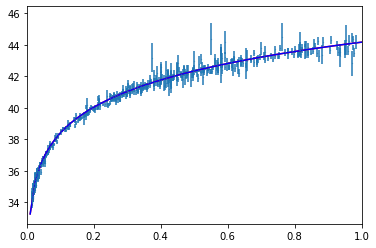

In [25]:
# Plot the apparent minus absolute magnitude as a function of redshift for the best-fit values of cosmological parameters and compare against data.

z = np.linspace(0.01,1.5,100)
plt.plot(z,dm_func(z,67.5,0.0224,0.120),'r')
plt.errorbar(z_data,mag_data,error_data,fmt='o',ms=.25)
plt.xlim(0,1.)

(0, 1.0)

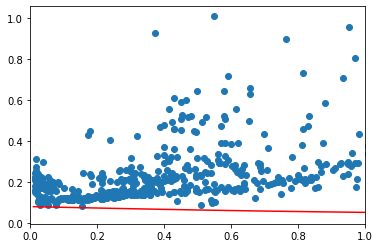

In [34]:
# To get some idea of how sensitive SN data might be to changes in the parameters, plot the difference between 
# two theory curves as compared with the error bars.

# Input some guessed values, see what effect the different parameters have.
H0guess=70
omegabguess=0.0224
omegacguess=0.120

#Plot difference between two theory curves and error bars.
z = np.linspace(0.01,1.5,100)
plt.plot(z,np.abs(dm_func(z,H0guess,omegabguess,omegacguess)-dm_func(z,67.5,0.0224,0.120)),'r')
plt.scatter(z_data,error_data)
plt.xlim(0,1.)

In [41]:
# Find the chi square at different values for the fractional density in dark matter.

# Set up a grid in $\Omega_c h^2$
omegas = np.linspace(0.1,.2,100)

# Loop through chi square at different values for $\Omega_c h^2$
r2=np.zeros(omegas.shape[0])
i=0
for omega_ch2 in omegas:
  r2[i] = np.sum((dm_func(z_data, 67.5, 0.0224, omegas[i]) - mag_data)**2/error_data**2)
  i+=1

# Find the value of $\Omega_c h^2$ that minimizes the chisqure. Compare with Planck best-fit value of $\Omega_c h^2 = 0.120$.

minindex = np.argmin(r2)
print(omegas[minindex])

0.1575757575757576


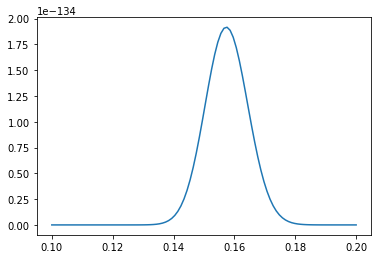

In [46]:
# Plot the likelihood function.

plt.plot(omegas,np.exp(-r2/2.))

In [43]:
# We can estimate the error on this answer by computing the 2nd derivative of the chi square.

# Functions for finite difference derivatives.

def deriv(x,y,x0,dx):
  h = x[x0]-x[x0+dx]
  return (y[x0-dx]-y[x0-dx])/(2.*h)

def deriv2(x,y,x0,dx):
  h = x[x0]-x[x0+dx]
  return (y[x0-dx]-2.*y[x0]+y[x0-dx])/(h**2)

d2 = deriv2(omegas,r2,minindex,2)
error_guess = 1./np.sqrt(d2)

# Find fractional error.
print(error_guess/omegas[minindex])

0.03613756333376601


In [0]:
# Challenge 1: Find a MCMC sampler, such as emceee, and find the full posterior over the 3-D parameter space.

In [0]:
# Challenge 2: Assuming that future supernovae will follow the distribution of supernova in the existing catalogue (e.g. number per unit redshift), 
# estimate how much larger a survey will be necessary to obtain 1% fractional errors on the cosmological parameters. 